# 資料集簡介

---



臉部圖片資料集：***Celebrity-Face-Recognition-Dataset***

來源 :　[https://github.com/prateekmehta59/Celebrity-Face-Recognition-Dataset](https://github.com/prateekmehta59/Celebrity-Face-Recognition-Dataset)

1.  80萬張臉部圖片
2.  1100位最受歡迎的名人組成
1.   每一位名人臉部張數約為700-800張之間
2.   臉部資料集大小共有 172 GB


---



**本專案程式使用的資料集設置**


---
使用６位名人的臉部圖片作為資料集來源使用。

分別為：

1. 'Aaron Judge'

2. 'Ben Stiller'

3. 'Ice Cube'

4. 'Adam Sandler'

5. 'Emily Watson'	

6. 'Jean Reno'


每一位名人臉部圖片數量為90張。

---

**臉部預測樣本設定**


---


每一位名人取出 4 張未存在訓練樣本裡臉部圖片，作為後面模型預測來源依據。


**參考來源**

---
"A simple classification model using Keras with Cloud TPUs"

https://github.com/tensorflow/tpu/blob/master/tools/colab/Classification_Iris_data_with_Keras.ipynb


"tensorflow/tpu colab"

https://github.com/tensorflow/tpu/tree/master/tools/colab

#1. 建立目錄

In [0]:
#顯示當前位置
!pwd

/content


In [0]:
#建立Model存放目錄
!mkdir Model

In [0]:
#建立log存放目錄
!mkdir log

In [0]:
#建立plot_figure存放目錄
!mkdir plot_figure

In [0]:
#顯示底下所有檔案清單
!ls

log  Model  plot_figure  sample_data


# 2.掛載Google Drive(圖片放置在Google雲端空間)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#顯示當前位置
!pwd

#顯示底下所有檔案清單
!ls

/content
gdrive	log  Model  plot_figure  sample_data


In [0]:
#顯示FaceImg底下檔案清單
!ls '/content/gdrive/My Drive/Your file path'

'Aaron Judge'	'Ben Stiller'	'Ice Cube'
'Adam Sandler'	'Emily Watson'	'Jean Reno'


In [0]:
#顯示FaceImg底下'Adam Sandler'檔案清單
!ls '/content/gdrive/My Drive/Your file path'

10.jpg	 181.jpg  238.jpg  39.jpg  50.jpg   641.jpg  67.jpg   742.jpg  77.jpg
11.jpg	 183.jpg  246.jpg  3.jpg   52.jpg   642.jpg  68.jpg   744.jpg  78.jpg
12.jpg	 189.jpg  24.jpg   40.jpg  56.jpg   648.jpg  695.jpg  74.jpg   79.jpg
13.jpg	 18.jpg   25.jpg   42.jpg  572.jpg  649.jpg  6.jpg    752.jpg  80.jpg
14.jpg	 1.jpg	  275.jpg  43.jpg  5.jpg    64.jpg   701.jpg  754.jpg  81.jpg
16.jpg	 21.jpg   29.jpg   44.jpg  616.jpg  652.jpg  702.jpg  755.jpg  82.jpg
175.jpg  223.jpg  2.jpg    45.jpg  617.jpg  65.jpg   708.jpg  756.jpg  83.jpg
176.jpg  228.jpg  32.jpg   46.jpg  636.jpg  666.jpg  70.jpg   763.jpg  89.jpg
178.jpg  22.jpg   33.jpg   47.jpg  638.jpg  673.jpg  719.jpg  768.jpg  8.jpg
17.jpg	 237.jpg  36.jpg   49.jpg  639.jpg  674.jpg  720.jpg  769.jpg  92.jpg


In [0]:
#顯示PredictFaceimg底下檔案清單
!ls '/content/gdrive/My Drive/Your file path'

'Aaron Judge'	'Ben Stiller'	'Ice Cube'
'Adam Sandler'	'Emily Watson'	'Jean Reno'


In [0]:
#顯示PredictFaceimg底下'Adam Sandler'檔案清單
!ls '/content/gdrive/My Drive/Your file path'

'Adam Sandler_01.jpg'  'Adam Sandler_03.jpg'
'Adam Sandler_02.jpg'  'Adam Sandler_04.jpg'


In [0]:
#顯示Facelabeldb底下檔案清單
!ls '/content/gdrive/My Drive/Your file path'

facelabel.db  facelabel.db3


#3. Import Python Package

In [0]:
!pip install sklearn

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib
from keras import backend as K
from keras.models import Model
# https://stackoverflow.com/questions/30667525/importerror-no-module-named-sklearn-cross-validation
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions 

import matplotlib.pyplot as plt
import random
import keras
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
import keras
import time
import os
import numpy as np
import cv2
import sqlite3

# 4.參數設置

In [0]:
gpu_no = "0" # GPU_index
# setting use GPU run
os.environ["CUDA_VISIBLE_DEVICES"] = gpu_no
#use_GPU = ['/gpu:0']
#use_GPU = ['/gpu:0','/gpu:1']
n_GPU = '/gpu:0'
I_CPU = '/cpu:0'

## GPU memory limit
#config = tf.ConfigProto(device_count={'gpu':0})
##config.gpu_options.per_process_gpu_memory_fraction = 0.3
#config.gpu_options.allow_growth = True
#session = tf.Session(config=config)
#KTF.set_session(session)

In [0]:
# ----------------------------------- Face Image Path ----------------------------------- 

# check current project location path
currentPath = os.getcwd()
print("Current Path: " + currentPath)

# select face data class
face_class = 6

# Figure storage directory
faceimg_dir = currentPath + '/gdrive/My Drive/Your file path'

# Predict of face img storage path
predict_faceimg_path = currentPath + '/gdrive/My Drive/Your file path'

# figure storage directory
figure_dir = currentPath + '/plot_figure/'

# figure classname
figure_classname = 'face_'+str(face_class)

# Save model and weight name
h5_model_name = currentPath + "/Model/FaceID_C" + str(face_class) + "_model.h5"
h5_model_weight_name = currentPath + "/Model/FaceID_C"+ str(face_class) + "_weight.h5"

# Face image file type
faceimg_type = ".jpg"

# Image resize
img_resize = 96

# Time format settings
time_format = '%Y-%m-%d %H:%M:%S'

print("faceimg_dir: {}".format(faceimg_dir))
print("predict_faceimg_path: {}".format(predict_faceimg_path))
print("h5_model_name: {}".format(h5_model_name))
print("h5_model_weight_name: {}".format(h5_model_weight_name))

In [0]:
# ----------------------------------- Variable  declard ----------------------------------- 

# Image dataset array declard
images = []
labels = []
label_class = []

# Train dataset
train_images = None # x
train_labels = None # y

# Valid dataset
valid_images = None # x
valid_labels = None # y

# Test dataset
test_images = None # x
test_labels = None # y

# Model declard
net_model = Model()
history = None

datagen = ImageDataGenerator()

# Train history declard
history = None

# SQL arguments settings
SQLite_name = "facelabel.db3"
dbconn = sqlite3.connect(currentPath+'/gdrive/My Drive/Your file path'+SQLite_name)
curs = dbconn.cursor()
db_TableName = 'facelabel'
column_faceindex = 'faceindex'
column_facename = 'facename'

#5. 方法宣告

**5.1讀取圖片**

In [0]:
def load_faceimg(faceimgpath,imgtype,img_resize):
    
    load_index = 0
    images = [] # face image
    labels = [] # face label
    label_class = []

    print("Start Scanning faceimg folder image class.\n")

    # run SQL DB Table clearn
    SQL_delete_syntax = '''
    DELETE FROM {}
    '''.format(db_TableName)
    
    SQL_run = curs.execute(SQL_delete_syntax)

    if SQL_run:

        dbconn.commit()

    else:

        print ('Run SQL_delete_syntax Faild.')

    # scan faceimg folder
    for dir_item in os.listdir(faceimgpath):

        #print("No."+str(load_index)+" [ "+dir_item+" ]")
        print("\nNo.{} [ {} ]".format(str(load_index),dir_item))
        
        load_index+=1
        label_class.append(dir_item)

        # join root directory and class folder name
        full_path = os.path.abspath(os.path.join(faceimgpath) + dir_item)
        print("Full Detail Path = {}".format(full_path))

        class_name = dir_item
#         print("Class: {}".format(class_name))
        num_img = 0

        # read image
        for dir_item in os.listdir(full_path):

#             print(dir_item)
            num_img+=1
            img_path = ""

            if dir_item.endswith(imgtype)and os.path.exists(str(full_path)):

                img_path = os.path.abspath(os.path.join(full_path) + "/" + dir_item)
                #print(img_path)
                image = cv2.imread(img_path)                
                image = cv2.resize(image,(img_resize,img_resize))

                # get image size
                img_width,img_height,channels = image.shape
                
                #if num_img < 10: # 1~9

                #    dir_item = str(dir_item).rstrip("_000" + str(num_img) + ".jpg").rstrip()

                #elif num_img >= 10 and num_img < 100: # 10~99

                #    dir_item = str(dir_item).rstrip("_00" + str(num_img) + ".jpg").rstrip()

                #elif num_img >= 100 and num_img < 1000: # 100~999

                #    dir_item = str(dir_item).rstrip("_0" + str(num_img) + ".jpg").rstrip()

                #else: # 10~99

                #    dir_item = str(dir_item).rstrip("_" + str(num_img) + ".jpg").rstrip()

                # add image to array
                images.append(image)
                labels.append(class_name)


        print("Image Quantity: {}".format(num_img))
        
    return  images,labels,img_width,img_height,channels,load_index,label_class

**5.2類別編成索引號碼**

In [0]:
def char_to_code(labels,label_class,n_class):

    for index,classname in label_class:

        labels = np.array([str(index) if label == classname else label for label in labels])   
        
        print(classname)
         
        # run SQL_Insert_syntax
        SQL_Insert_syntax = '''
        INSERT INTO {}('{}','{}')
        VALUES('{}','{}')
        '''.format(db_TableName,column_faceindex,column_facename,str(index),str(classname))
        
        print("SQL_Insert_syntax: {}".format(SQL_Insert_syntax))
        
        SQL_run = curs.execute(SQL_Insert_syntax)

        if SQL_run:
            dbconn.commit()
        else:
            print ('Run SQL_Insert_syntax Faild.')

    return labels

**5.3資料集處理**

In [0]:
def process_data(images,labels,img_rows,img_cols ,img_channels,n_class):
  
    # train dataset
    train_images = None # x
    train_labels = None # y

    #valid dataset
    valid_images = None # x
    valid_labels = None # y

    #test dataset
    test_images = None # x
    test_labels = None # y

    # split dataset 'train'、'valid'、'test'
    train_images,valid_images,train_labels,valid_labels = train_test_split(images,labels,test_size = 0.2,random_state = random.randint(0,n_class))
    _,test_images,_,test_labels = train_test_split(train_images,train_labels,test_size = 0.3,random_state = random.randint(0,n_class))
    
    # https://faroit.github.io/keras-docs/1.2.2/backend/

    if K.image_dim_ordering() == 'th': # img_channels,img_rows,img_cols

        train_images = train_images.reshape(train_images.shape[0],img_channels,img_rows,img_cols)
        valid_images = valid_images.reshape(valid_images.shape[0],img_channels,img_rows,img_cols)
        test_images = test_images.reshape(test_images.shape[0],img_channels,img_rows,img_cols)

    else: # img_rows,img_cols,img_channels

        train_images = train_images.reshape(train_images.shape[0],img_rows,img_cols,img_channels)
        valid_images = valid_images.reshape(valid_images.shape[0],img_rows,img_cols,img_channels)
        test_images = test_images.reshape(test_images.shape[0],img_rows,img_cols,img_channels)
    
    # normalize data
    train_images,valid_images,test_images = normalize_data(train_images,valid_images,test_images)

    # show "train_images"、"valid_imagess"、"test_images" length
    print("\n\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print("Train Sample: {}".format(train_images.shape[0]))
    print("Valid Sample: {}".format(valid_images.shape[0]))
    print("Test Sample: {}".format(test_images.shape[0]))
    
    #print("{}\n".format(train_images))
    #print("{}\n".format(valid_images))
    #print("{}\n".format(test_images))
    
    #如果你要用TPU執行訓練，不能用One-Hot編碼，會出現錯誤訊息
    #https://blog.csdn.net/roger_royer/article/details/79968523
    # One Hot Code process "train_labels","valid_labels","test_labels"
#     train_labels,valid_labels,test_labels = one_hot_process(train_labels,valid_labels,test_labels,n_class)

    print("Train Labels Sample: {}".format(train_labels.shape[0]))
    print("Valid Labels Sample: {}".format(valid_labels.shape[0]))
    print("Test Labels Sample: {}".format(test_labels.shape[0]))
    
    #print("{}\n".format(train_labels))
    #print("{}\n".format(valid_labels))
    #print("{}\n".format(test_labels))
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

    return train_images,valid_images,test_images,train_labels,valid_labels,test_labels
  

  
#One Hot Code for label vector
def one_hot_process(train_labels,valid_labels,test_labels,n_class):

    train_labels = np_utils.to_categorical(train_labels,n_class)
    valid_labels = np_utils.to_categorical(valid_labels,n_class)
    test_labels = np_utils.to_categorical(test_labels,n_class)

    return train_labels,valid_labels,test_labels

  

# Normalize data 資料正規化
def normalize_data(train_images,valid_images,test_images):

    train_images = train_images.astype('float32')
    valid_images = valid_images.astype('float32')
    test_images = test_images.astype('float32')

    train_images /= 255
    valid_images /= 255
    test_images /= 255

    return train_images,valid_images,test_images

**5.4產生訓練模型後Accuracy與Loss變化圖**

In [0]:
'''
http://noahsnail.com/2017/04/29/2017-4-29-matplotlib%E7%9A%84%E5%9F%BA%E6%9C%AC%E7%94%A8%E6%B3%95(%E5%9B%9B)%E2%80%94%E2%80%94%E8%AE%BE%E7%BD%AElegend%E5%9B%BE%E4%BE%8B/
https://blog.csdn.net/Quincuntial/article/details/70947363
https://www.jianshu.com/p/91eb0d616adb
'''
       

def plot_figure(history,dir,figure_classname):

    __plot_acc(history,dir,figure_classname)

    #plt.subplot(1,2,1)

    __plot_loss(history,dir,figure_classname)

    #plt.show()


def __plot_acc(hist,dir,figure_classname):
        
    acc = hist.history['sparse_categorical_accuracy']
    val_acc = hist.history['val_sparse_categorical_accuracy']
        
    # img size
    plt.figure(figsize=(8,8))
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title(figure_classname+'_Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train_acc', 'valid_acc'], loc='best')
    plt.tight_layout()
    plt.savefig(dir+figure_classname+'_Accuracy.png')
    #plt.show()

def __plot_loss(hist,dir,figure_classname):

    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    # img size
    plt.figure(figsize=(8,8))        
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(figure_classname+'_Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train_loss', 'valid_loss'], loc='best')
    plt.tight_layout()
    plt.savefig(dir+figure_classname+'_Loss.png')
    #plt.show()

#6. Image前置處理

**6.1讀取圖像**

In [0]:
start_time = time.time()
    
# Get img dataset
images,labels,img_width,img_height,channels,n_class,label_class = load_faceimg(faceimg_dir,faceimg_type,img_resize)
    
print("\n\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")

# Show number of class
print("Number Of Class: {} \n {} \n".format(n_class,label_class))

# Show img dataset length
print("Images Length: {} \nLabels Length: {}".format(len(images),len(labels)))

# Show img size
print("Image Size: {}x{}x{}".format(img_width,img_height,channels))
    
images = np.array(images)    
labels = np.array(labels)

Start Scanning faceimg folder image class.


No.0 [ Jean Reno ]
Full Detail Path = /content/gdrive/My Drive/106資管碩士一甲/雲端運算系統/FaceImg/Jean Reno
Image Quantity: 90

No.1 [ Emily Watson ]
Full Detail Path = /content/gdrive/My Drive/106資管碩士一甲/雲端運算系統/FaceImg/Emily Watson
Image Quantity: 90

No.2 [ Ben Stiller ]
Full Detail Path = /content/gdrive/My Drive/106資管碩士一甲/雲端運算系統/FaceImg/Ben Stiller
Image Quantity: 90

No.3 [ Adam Sandler ]
Full Detail Path = /content/gdrive/My Drive/106資管碩士一甲/雲端運算系統/FaceImg/Adam Sandler
Image Quantity: 90

No.4 [ Aaron Judge ]
Full Detail Path = /content/gdrive/My Drive/106資管碩士一甲/雲端運算系統/FaceImg/Aaron Judge
Image Quantity: 90

No.5 [ Ice Cube ]
Full Detail Path = /content/gdrive/My Drive/106資管碩士一甲/雲端運算系統/FaceImg/Ice Cube
Image Quantity: 90


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Number Of Class: 6 
 ['Jean Reno', 'Emily Watson', 'Ben Stiller', 'Adam Sandler', 'Aaron Judge', 'Ice Cube'] 

Images Length: 540 
Labels Length: 540
Image Size: 96x96x3


**6.2圖像資料集處理(混淆矩陣、分類索引編碼)**

In [0]:
# shuffle data
perm_array = np.arange(len(images))
np.random.shuffle(perm_array)
images = images[perm_array]
labels = labels[perm_array]

print(images.shape)
print(labels.shape)
# print(labels)

label_class = enumerate(label_class)

# for index, classname in label_class:
#   print(classname)

# char convert to int code
labels = char_to_code(labels,label_class,n_class)

# print(labels)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

(540, 96, 96, 3)
(540,)
Jean Reno
SQL_Insert_syntax: 
        INSERT INTO facelabel('faceindex','facename')
        VALUES('0','Jean Reno')
        
Emily Watson
SQL_Insert_syntax: 
        INSERT INTO facelabel('faceindex','facename')
        VALUES('1','Emily Watson')
        
Ben Stiller
SQL_Insert_syntax: 
        INSERT INTO facelabel('faceindex','facename')
        VALUES('2','Ben Stiller')
        
Adam Sandler
SQL_Insert_syntax: 
        INSERT INTO facelabel('faceindex','facename')
        VALUES('3','Adam Sandler')
        
Aaron Judge
SQL_Insert_syntax: 
        INSERT INTO facelabel('faceindex','facename')
        VALUES('4','Aaron Judge')
        
Ice Cube
SQL_Insert_syntax: 
        INSERT INTO facelabel('faceindex','facename')
        VALUES('5','Ice Cube')
        
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


**6.3分割圖像資料集**

In [0]:
# dataset process generate
with tf.device(I_CPU):
    train_images,valid_images,test_images,train_labels,valid_labels,test_labels = process_data(images,labels,img_height,img_width,channels,n_class)
    #print(train_images.shape[0])



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Train Sample: 432
Valid Sample: 108
Test Sample: 130
Train Labels Sample: 432
Valid Labels Sample: 108
Test Labels Sample: 130
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


#7. 建立神經網路模型

**7.1設置Model參數儲存位置**

In [0]:
ouputlog_filename = "model_arg_log.txt"
output_path= currentPath+'/log/model_log/'      

def outputmodellog(getlog):

    if not os.path.exists(str(output_path + ouputlog_filename)):
         os.mkdir(str(output_path))

    filewrite = open(str(output_path + ouputlog_filename), 'w')
    filewrite.write(getlog)
    filewrite.close()

**7.2Neural Network Model架構參數設置**

In [0]:
# ----------------------------------- Model argument settings ----------------------------------- 

# you can use these optimizer option: "SGD", "RMSprop", "Adam", "Adagrad",
# "Adadelta"
optimizer = 'Adam'

# you can use these loss option:
# "categorical_crossentropy","mean_squared_error","mean_absolute_error","cosine_proximity"
loss = 'categorical_crossentropy'

# net layer argument settings
# input layer
inputlayer_Activation = 'relu'
inputlayer_conv2D_hidden_unit = 32
inputlayer_conv2D_kernel_size = (3,3)
inputlayer_conv2D_padding = 'same'

# one layer
onelayer_conv2D_hidden_unit = 32
onelayer_conv2D_kernel_size = (3,3)
# onelayer_conv2D_padding = 'same'
onelayer_Activation = 'relu'
onelayer_MaxPooling2D_pool_size = (2,2)
onelayer_Dropout = 0.25

# two layer
twolayer_conv2D_hidden_unit = 64
twolayer_conv2D_kernel_size = (3,3)
# twolayer_conv2D_padding = 'same'
twolayer_Activation = 'relu'
twolayer_MaxPooling2D_pool_size = (2,2)
twolayer_Dropout = 0.25

# three layer
threelayer_conv2D_hidden_unit = 128
threelayer_conv2D_kernel_size = (3,3)
# threelayer_conv2D_padding = 'same'
threelayer_Activation = 'relu'
threelayer_MaxPooling2D_pool_size = (2,2)
threelayer_Dropout = 0.5

# four layer
fourlayer_conv2D_hidden_unit = 256
fourlayer_conv2D_kernel_size = (3,3)
# fourlayer_conv2D_padding = 'same'
fourlayer_Activation = 'relu'
fourlayer_MaxPooling2D_pool_size = (2,2)
fourlayer_Dropout = 0.25

# full-connection layer
full_connectionlayer_Dense = 1024
full_connectionlayer_Activation = 'relu'
full_connectionlayer_Dropout = 0.5

# output layer
ouputlayer_Activation = 'softmax'

**7.3建置Neural Network Model Function**

In [0]:
def build_model(img_width,img_height,channels,n_class):

    input_shape = (img_width,img_height,channels)

#     model = Sequential()
    
    model = tf.contrib.keras.models.Sequential()
    
    # Input layer
    model.add(tf.contrib.keras.layers.Conv2D(32, kernel_size=inputlayer_conv2D_kernel_size,
                 activation=inputlayer_Activation,
                 input_shape=input_shape))

    # One hiddenlayer (Conv2D,Activation,MaxPooling2D,Dropout)
    model.add(tf.contrib.keras.layers.Conv2D(onelayer_conv2D_hidden_unit, onelayer_conv2D_kernel_size, activation=onelayer_Activation))
    model.add(tf.contrib.keras.layers.MaxPooling2D(pool_size=onelayer_MaxPooling2D_pool_size))
    model.add(tf.contrib.keras.layers.Dropout(onelayer_Dropout))      


    # Two hiddenlayer(Conv2D,Activation,MaxPooling2D,Dropout)
    model.add(tf.contrib.keras.layers.Conv2D(twolayer_conv2D_hidden_unit, twolayer_conv2D_kernel_size, activation=twolayer_Activation))
    model.add(tf.contrib.keras.layers.MaxPooling2D(pool_size=twolayer_MaxPooling2D_pool_size))
    model.add(tf.contrib.keras.layers.Dropout(twolayer_Dropout))      
    
    
    # Three hiddenlayer(Conv2D,Activation,MaxPooling2D,Dropout)
    model.add(tf.contrib.keras.layers.Conv2D(threelayer_conv2D_hidden_unit, threelayer_conv2D_kernel_size, activation=threelayer_Activation))
    model.add(tf.contrib.keras.layers.MaxPooling2D(pool_size=threelayer_MaxPooling2D_pool_size))
    model.add(tf.contrib.keras.layers.Dropout(threelayer_Dropout)) 
    

    # Four hiddenlayer(Conv2D,Activation,MaxPooling2D,Dropout)
    model.add(tf.contrib.keras.layers.Conv2D(fourlayer_conv2D_hidden_unit, fourlayer_conv2D_kernel_size, activation=fourlayer_Activation))
    model.add(tf.contrib.keras.layers.MaxPooling2D(pool_size=fourlayer_MaxPooling2D_pool_size))
    model.add(tf.contrib.keras.layers.Dropout(fourlayer_Dropout)) 
    

    # Flatten layer
    model.add(tf.contrib.keras.layers.Flatten())

    
    # Full-connection layer(Dense,Activation,Dropout)
    model.add(tf.contrib.keras.layers.Dense(full_connectionlayer_Dense, activation=full_connectionlayer_Activation))
    model.add(tf.contrib.keras.layers.Dropout(full_connectionlayer_Dropout))
    

    # Output layer
    model.add(tf.contrib.keras.layers.Dense(n_class, activation=ouputlayer_Activation))

    model.summary()

    return model

**7.4建置Neural Network Model**

In [0]:
# 產生Model架構
net_model = build_model(img_width,img_height,channels,n_class)

# 配置TPU Model
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
            net_model,
            strategy=tf.contrib.tpu.TPUDistributionStrategy(
                tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
            )
)


# 編譯TPU Model (optimizer、loss、metrics)
tpu_model.compile(
            optimizer=tf.train.AdamOptimizer(learning_rate=0.00015, ),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=['sparse_categorical_accuracy']
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 22, 22, 64)        0         
__________

#8. 訓練模型

In [0]:
# ----------------------------------- Train argument settings ----------------------------------- 

batch_size = 23

epochs = 84

verbose=1

In [0]:
# ImageDataGenerator declard and argument settings
# https://chtseng.wordpress.com/2017/11/11/data-augmentation-%E8%B3%87%E6%96%99%E5%A2%9E%E5%BC%B7/
datagen = ImageDataGenerator(featurewise_center = False,
        samplewise_center  = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization  = False,
        zca_whitening = False,
        rotation_range = 20,
        width_shift_range  = 0.2,
        height_shift_range = 0.2,
        horizontal_flip = True,
        vertical_flip = False)

print("\n\n")
print(device_lib.list_local_devices())
    
print("\n\nWait for configure operation sources...... \n\n")

# process image computing of
# "featurewise_center","featurewise_std_normalization","zca_whitening"
datagen.fit(train_images)


def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, train_images.shape[0] - batch_size)
    yield train_images[offset:offset+batch_size], train_labels[offset:offset + batch_size]


steps_per_epoch = (len(train_images) / batch_size)
# steps_per_epoch =len(train_images)/2 
# steps_per_epoch =len(train_images)

# start train
# Training
history = tpu_model.fit_generator(
        train_gen(batch_size),
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_data=(test_images, test_labels)
)
  


# with tf.device(n_GPU): 
   
#      history = net_model.fit_generator(datagen.flow(train_images, train_labels,batch_size = batch_size),
#                                         steps_per_epoch = steps_per_epoch,
#                                         epochs = epochs,
#                                         verbose = verbose,                                                                      
#                                         validation_data = (valid_images,valid_labels))




[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13564086524381236334
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11783723504656819813
physical_device_desc: "device: XLA_CPU device"
]


Wait for configure operation sources...... 


Epoch 1/84
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(2,), dtype=tf.int32, name='core_id_460'), TensorSpec(shape=(2, 96, 96, 3), dtype=tf.float32, name='conv2d_120_input_10'), TensorSpec(shape=(2, 1), dtype=tf.float32, name='dense_49_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_120_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 50.77664065361023 secs
INFO:tensorflow:Setting weights on TPU model.
18/18 [===========================>..] - ETA: 3s - loss: 1.8241 - sparse_categorical_accuracy: 0.1562IN

#9. 驗證模型

In [0]:
# print(valid_labels , end='\n\n')
# print(test_labels,end='\n\n')

# print(type(valid_labels))
# print(type(test_labels))


In [0]:
#print(history.history)

# Evaluate model
# score = tpu_model.evaluate(test_images,test_labels, verbose=1)
score = tpu_model.evaluate(valid_images,valid_labels, verbose=1)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("Test Accuracy: {:.2f}".format(score[1]))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(4,), dtype=tf.int32, name='core_id_470'), TensorSpec(shape=(4, 96, 96, 3), dtype=tf.float32, name='conv2d_120_input_10'), TensorSpec(shape=(4, 1), dtype=tf.float32, name='dense_49_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_120_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 46.099350452423096 secs
108/108 [==============================] - 50s 460ms/step
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Test Accuracy: 0.70
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


**9.1產生分析圖**

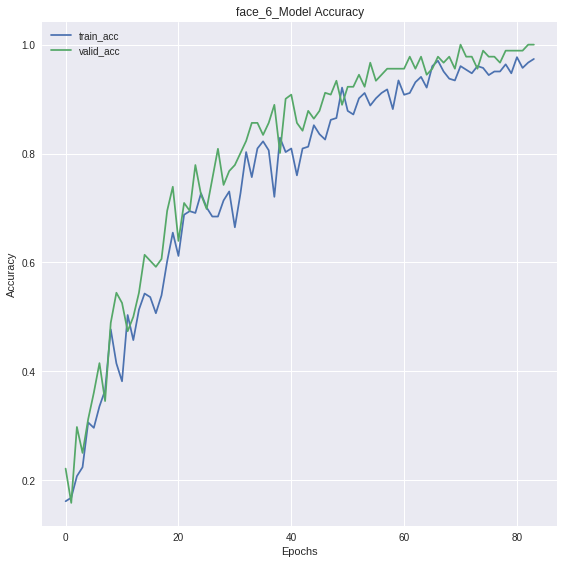

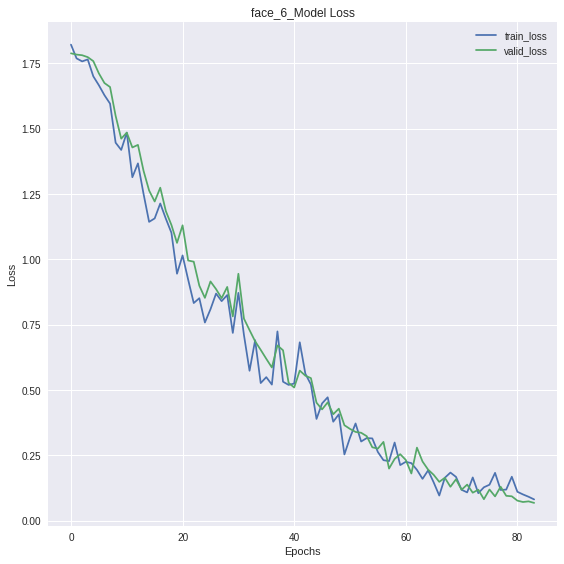

In [0]:
# create figure
plot_figure(history,figure_dir,figure_classname)

**9.2儲存神經網路模型**

In [0]:
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("h5_Model_Weigth Save Path: {}".format(h5_model_weight_name))
print("h5_Model Save Path: {}".format(h5_model_name))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

# save model and weight
tpu_model.save_weights(h5_model_weight_name)
tpu_model.save(h5_model_name)

print("\n顯示/content/Model底下檔案清單:")

#顯示/content/Model底下檔案清單
!ls '/content/Model'

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
h5_Model_Weigth Save Path: /content/Model/FaceID_C6_weight.h5
h5_Model Save Path: /content/Model/FaceID_C6_model.h5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:Copying TPU weights to the CPU

顯示/content/Model底下檔案清單:
FaceID_C6_model.h5  FaceID_C6_weight.h5


In [0]:
end_time = '{:.2f}'.format((time.time() - start_time))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("Speed Time: {}s".format(end_time))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Speed Time: 957.43s
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


#10. 預測圖片

**10.1載入模型**

In [0]:
# log output file
outputfile_path = currentPath + '/log'
write_fileName = str(face_class)+"_prediction_output.txt"
full_outputfile_path = os.path.abspath(os.path.join(outputfile_path + write_fileName))

start_time = time.time()

# tf.contrib.predictor.from_saved_model 參考來源
# https://www.tensorflow.org/api_docs/python/tf/contrib/predictor/from_saved_model
get_model= tf.keras.models.load_model(
            h5_model_name,
            custom_objects=None,
            compile=True
          )

print('Start Load Model......')
      
print("Model Name: {}\nPath: {}".format("FaceID_C" + str(face_class) + "_model.h5",h5_model_name))

print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# check model construction
print("Model layer length: {}".format(len(get_model.layers)))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")

get_model.summary()

Start Load Model......
Model Name: FaceID_C6_model.h5
Path: /content/Model/FaceID_C6_model.h5

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Model layer length: 17
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_9

**10.2載入預測圖片與進行預測**

In [0]:
#--------------------------- load face image -----------------------
correct_count = 0
err_count = 0
detail_log = ""
temp_log = ""

print('Start Load Face Image.\n')

temp_log='''
 --------------------------------------------------------------------------

This is run keras model predict result log.
The face class : [ {} ] and model use [ {} ].     

--------------------------------------------------------------------------
 \n\n '''.format(face_class , h5_model_name)


# 讀取指定的位置下目錄
for dir_list in os.listdir(predict_faceimg_path):

    load_start_time = time.time()
      
    # 產生絕對路徑，將當前指定位置與該位置下的目錄名稱串接一起
    full_path = os.path.abspath(os.path.join(predict_faceimg_path+dir_list))
        
    #判斷絕對路徑是否為一個目錄資料夾
    if os.path.isdir(full_path):
            
        # 讀取目錄資料夾內檔案
        for dir_item in os.listdir(full_path):
              
            print('Load Face Image:  {} '.format(dir_item))
                
            # 產生絕對路徑 ，將目錄資料名稱與目錄資料夾內檔案串接一起
            item_path = os.path.abspath(os.path.join(full_path+'/'+dir_item))
                
            #img = image.load_img(full_path)
            img = cv2.imread(item_path) # 讀取圖片，使用OpenCV
            img = cv2.resize(img,(img_resize,img_resize)) # 重新設置圖片大小
            #print('Image size: {}'.format(img.size))
                
            # Image convert to array
            img_array = image.img_to_array(img)
            #print('Image shape: {}'.format(img_array.shape))
                
            # Image shape change dimensions ex: (640,480,3) --> (None,640,480,3)
            img_array = np.expand_dims(img_array, axis=0)
            #print('Image change dims shape: {}\n'.format(img_array.shape))

            img_array = img_array.astype('float32')
            img_array /= 255
                
            #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
                
            # 執行模型預測
            predict_result = get_model.predict(img_array,batch_size=batch_size,verbose=verbose)
                
            # 取得該圖片所屬的分類索引
            faceindex = np.argmax(predict_result[0])
            
#             print("faceindex: {}".format(faceindex))
                
            # SQL 語法
            SQL_select_syntax = '''
            SELECT {},{} FROM {} WHERE {} = '{}'
            '''.format(column_faceindex,column_facename,db_TableName, column_faceindex, faceindex)
                
                
            # 查詢SQLite內的分類索引
            SQL_run = curs.execute(SQL_select_syntax)
                 
            # 取得SQL查詢結果
            SQL_result = curs.fetchall()
            
            #判斷是否有查詢結果
            if len(SQL_result) > 0:
              
                #開檔
                filewrite = open(full_outputfile_path, 'w')
#                 print('Face index select result of : {}'.format(SQL_result))
                
                load_end_time = '{:.2f}'.format((time.time() - load_start_time))
                #print("Speed Time: {}s".format(load_end_time))
      
                # 產生Log訊息
                temp_log += "\n"
                temp_log += " >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n"
                temp_log += " Load Face Image:  {}\n".format(dir_item)
                temp_log += " Face Image Predict result of : {} ,[{}]\n".format(SQL_result[0][0],faceindex)
                temp_log += " Speed Time: {}s\n".format(load_end_time)
                temp_log += " >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n"
                
                #temp_log = temp_log + '''\n
                #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n
                #\n
                #Load Face Image:  {}\n
                #Face Image Predict result of : {} ,[{}]\n
                #Speed Time: {}s\n
                #\n
                #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
                #\n\n\n
                #'''.format(dir_item,SQL_result,faceindex,load_end_time)

                #print(type(SQL_result))
#                 print(SQL_result)
                print("預測所屬類別：[{}] , {}".format(SQL_result[0][0],SQL_result[0][1]))
                print("所屬類別: {}".format(dir_list))
                print("\n")
                  
                # 比對模型預測的結果是否正確
                if dir_list != SQL_result[0][1]:
                    
                    err_count +=1 # 累加錯誤預測次數
                        
                    # 產生Log訊息
                    detail_log += "\t\t>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n"
                    detail_log += ''' \t\t"{}" Predict ----> {} (X)\n'''.format(dir_item,SQL_result[0][1])
                    detail_log += "\t\t>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n\n" 
                    
                else:
                      
                    correct_count +=1 # 累加正確預測次數
                        
                    # 產生Log訊息
                    detail_log += ''' \t\t"{}"  Predict ----> {} (O)\n\n'''.format(dir_item,SQL_result[0][1])
                    
                    
            else:

                 print ('Run SQL Error')

                 #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
                  
                  
end_time = '{:.2f}'.format((time.time() - start_time))
        
# 產生Log訊息
temp_log = temp_log +'''\n\nFull Speed Time: {}s\n\n'''.format(end_time)
      
# 產生Log訊息
detail_log +='''
\t\t\t-------------------------------
\t\t\tPredict Correct count:  {}
\t\t\tPredict Error   count:  {} 
\t\t\t-------------------------------
'''.format(correct_count,err_count)
      
print("\n <<------------------------------------ 預測結果 ------------------------------------>>\n{}".format(detail_log))
# print(detail_log)
    
# 寫檔
filewrite.write(temp_log + detail_log)
# 關檔
filewrite.close()

print("\t\t\tFull Speed Time: {}s".format(end_time))

#-------------------------------------------------------------------




Start Load Face Image.

Load Face Image:  Jean Reno_02.jpg 
1/1 [==============================] - 21s 21s/step
預測所屬類別：[0] , Jean Reno
所屬類別: Jean Reno


Load Face Image:  Jean Reno_01.jpg 
1/1 [==============================] - 0s 16ms/step
預測所屬類別：[0] , Jean Reno
所屬類別: Jean Reno


Load Face Image:  Jean Reno_04.jpg 
1/1 [==============================] - 0s 17ms/step
預測所屬類別：[0] , Jean Reno
所屬類別: Jean Reno


Load Face Image:  Jean Reno_03.jpg 
1/1 [==============================] - 0s 16ms/step
預測所屬類別：[0] , Jean Reno
所屬類別: Jean Reno


Load Face Image:  Ben Stiller_03.jpg 
1/1 [==============================] - 0s 17ms/step
預測所屬類別：[2] , Ben Stiller
所屬類別: Ben Stiller


Load Face Image:  Ben Stiller_02.jpg 
1/1 [==============================] - 0s 16ms/step
預測所屬類別：[2] , Ben Stiller
所屬類別: Ben Stiller


Load Face Image:  Ben Stiller_01.jpg 
1/1 [==============================] - 0s 16ms/step
預測所屬類別：[2] , Ben Stiller
所屬類別: Ben Stiller


Load Face Image:  Ben Stiller_04.jpg 
1/1 [============